# End-to-End Simulation Results Analysis

First, we import the necessary modules.

In [92]:
import pandas as pd
import numpy as np
import statsmodels.nonparametric.api as smnp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set plotting styles
sns.set_style("darkgrid")
sns.set_context("paper")

## Data Preparation

Now, we load the data into data structures to show the results.

In [93]:
with open('../data/majestic_million.csv', 'r') as f:
    df_majestic_million = pd.read_csv(f)

In [94]:
with open('results_client_request_rate_10.txt', 'r') as f:
    df_client_request_10 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                           'Drop Rate', 'Retransmission Rate', 
                                                           'Average Latency'])

In [95]:
with open('results_client_request_rate_100.txt', 'r') as f:
    df_client_request_100 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                            'Drop Rate', 'Retransmission Rate', 
                                                            'Average Latency'])

In [96]:
with open('results_client_request_rate_25.txt', 'r') as f:
    df_client_request_25 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                           'Drop Rate', 'Retransmission Rate', 
                                                           'Average Latency'])

In [97]:
with open('results_client_request_rate_50.txt', 'r') as f:
    df_client_request_50 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                           'Drop Rate', 'Retransmission Rate',
                                                           'Average Latency'])

In [98]:
with open('results_client_request_rate_75.txt', 'r') as f:
    df_client_request_75 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                           'Drop Rate', 'Retransmission Rate', 
                                                           'Average Latency'])

In [99]:
with open('results_max_cache_1000.txt', 'r') as f:
    df_max_cache_1000 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                        'Drop Rate', 'Retransmission Rate', 
                                                        'Average Latency'])

In [100]:
with open('results_max_cache_2500.txt', 'r') as f:
    df_max_cache_2500 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                        'Drop Rate', 'Retransmission Rate', 
                                                        'Average Latency'])

In [101]:
with open('results_max_cache_5000.txt', 'r') as f:
    df_max_cache_5000 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                        'Drop Rate', 'Retransmission Rate', 
                                                        'Average Latency'])

In [102]:
with open('results_max_cache_10000.txt', 'r') as f:
    df_max_cache_10000 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                         'Drop Rate', 'Retransmission Rate', 
                                                         'Average Latency'])

In [103]:
with open('results_rx_error_0_05.txt', 'r') as f:
    df_rx_error_0_05 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                       'Drop Rate', 'Retransmission Rate', 
                                                       'Average Latency'])

In [104]:
with open('results_rx_error_0_1.txt', 'r') as f:
    df_rx_error_0_1 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                      'Drop Rate', 'Retransmission Rate', 
                                                      'Average Latency'])

In [105]:
with open('results_rx_error_0_15.txt', 'r') as f:
    df_rx_error_0_15 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                       'Drop Rate', 'Retransmission Rate', 
                                                       'Average Latency'])

In [106]:
with open('results_tx_error_0_05.txt', 'r') as f:
    df_tx_error_0_05 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                       'Drop Rate', 'Retransmission Rate', 
                                                       'Average Latency'])

In [107]:
with open('results_tx_error_0_1.txt', 'r') as f:
    df_tx_error_0_1 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                      'Drop Rate', 'Retransmission Rate', 
                                                      'Average Latency'])

In [108]:
with open('results_tx_error_0_15.txt', 'r') as f:
    df_tx_error_0_15 = pd.read_csv(f, header=0, names=['Bytes Sent and Received', 'Hit Rate', 
                                                       'Drop Rate', 'Retransmission Rate', 
                                                       'Average Latency'])

Here, we format the data into data structures to use for graphing.

In [109]:
client_request_rates = {'10 req/s': df_client_request_10, '25 req/s': df_client_request_25, 
                        '50 req/s': df_client_request_50, '75 req/s': df_client_request_75, 
                        '100 req/s': df_client_request_100}
max_cache = {'1000 Entries': df_max_cache_1000, '2500 Entries': df_max_cache_2500, 
             '5000 Entries': df_max_cache_5000, '10000 Entries': df_max_cache_10000}
rx_error = {'0.05% Error': df_rx_error_0_05, '0.10% Error': df_rx_error_0_1}
tx_error = {'0.05% Error': df_tx_error_0_05, '0.10% Error': df_tx_error_0_1}

# Visualization

We graph the following data or relationships below:

- CDF of the popularity of the top 10,000 sites as measured by the total number of referring subnets
- The average latency over SARATOGA over 100 rounds for varying client request rate, maximum cache entries, transmission error, and receiving error percentage (hereafter referred to as the "parameters".
- The hit rate percentage over SARATOGA over 100 rounds for varying parameters
- The drop rate percentage over SARATOGA over 100 rounds for varying parameters
- The drop rate percentage over SARATOGA versus the client request rate, which roughly tells us the scalability of our system
- The retransmission rate over SARATOGA versus the transmitting and receiving error rates as well as the other parameters

## Top Sites Popularity

In [110]:
df_majestic_million.head(10)

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,426424,2686164,google.com,com,1,1,426586,2686294
1,2,2,facebook.com,com,418629,2804543,facebook.com,com,2,2,418884,2805723
2,3,3,youtube.com,com,380572,2242634,youtube.com,com,3,3,380772,2243662
3,4,4,twitter.com,com,376875,2334057,twitter.com,com,4,4,377078,2335059
4,5,5,microsoft.com,com,270721,893136,microsoft.com,com,5,5,270886,892910
5,6,6,linkedin.com,com,263635,1179837,linkedin.com,com,6,6,263805,1180343
6,7,1,wikipedia.org,org,261477,1125716,wikipedia.org,org,7,1,261669,1126198
7,8,7,plus.google.com,com,259924,1326611,plus.google.com,com,8,7,259954,1326839
8,9,8,apple.com,com,249712,934846,apple.com,com,9,8,249911,935311
9,10,9,instagram.com,com,240499,1136838,instagram.com,com,10,9,240472,1136863


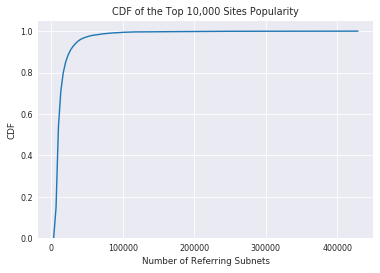

In [111]:
plt.clf()
sns.kdeplot(df_majestic_million['RefSubNets'][0:10000], 
            legend=False, cumulative=True)
plt.title('CDF of the Top 10,000 Sites Popularity')
plt.xlabel('Number of Referring Subnets')
plt.ylabel('CDF')
plt.savefig('top10000sites_popularity_CDF.png')
plt.show()

## Average Latency Versus Round Number

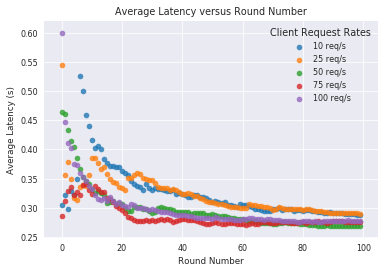

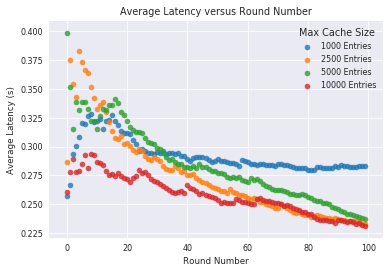

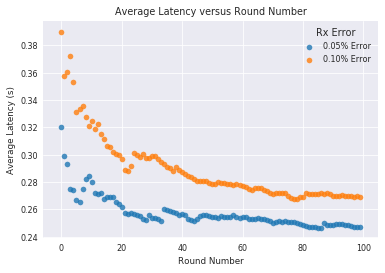

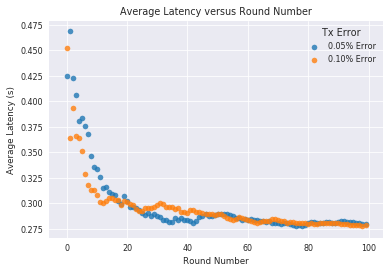

In [112]:
plt.clf()

fig, ax = plt.subplots()
for k, v in client_request_rates.items():
    sns.regplot(x=pd.Series(v.index), y=v['Average Latency'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Average Latency versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Average Latency (s)')
plt.legend(title="Client Request Rates")
plt.savefig('average_latency_round_number_client_request_rate.png')

fig, ax = plt.subplots()
for k, v in max_cache.items():
    sns.regplot(x=pd.Series(v.index), y=v['Average Latency'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Average Latency versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Average Latency (s)')
plt.legend(title="Max Cache Size")
plt.savefig('average_latency_round_number_max_cache_size.png')

fig, ax = plt.subplots()
for k, v in rx_error.items():
    sns.regplot(x=pd.Series(v.index), y=v['Average Latency'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Average Latency versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Average Latency (s)')
plt.legend(title="Rx Error")
plt.savefig('average_latency_round_number_rx_error.png')

fig, ax = plt.subplots()
for k, v in tx_error.items():
    sns.regplot(x=pd.Series(v.index), y=v['Average Latency'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Average Latency versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Average Latency (s)')
plt.legend(title="Tx Error")
plt.savefig('average_latency_round_number_tx_error.png')

plt.show()

## Hit Rate Versus Round Number

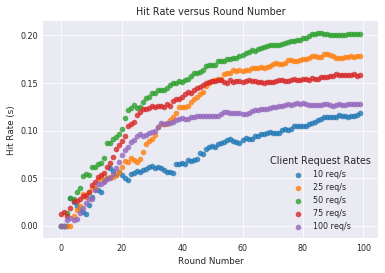

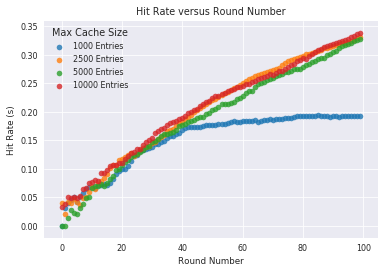

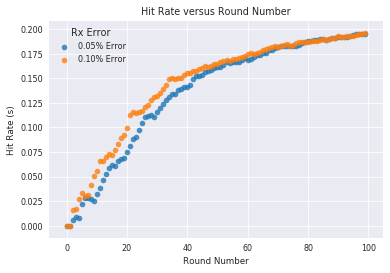

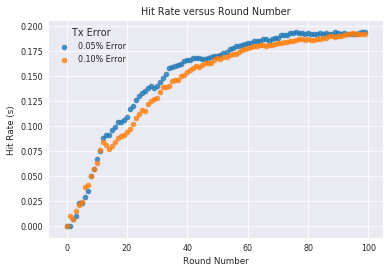

In [113]:
plt.clf()

fig, ax = plt.subplots()
for k, v in client_request_rates.items():
    sns.regplot(x=pd.Series(v.index), y=v['Hit Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Hit Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Hit Rate (s)')
plt.legend(title="Client Request Rates")
plt.savefig('hit_rate_round_number_client_request_rate.png')

fig, ax = plt.subplots()
for k, v in max_cache.items():
    sns.regplot(x=pd.Series(v.index), y=v['Hit Rate'],
                fit_reg=False, label=k, ax=ax)
plt.title('Hit Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Hit Rate (s)')
plt.legend(title="Max Cache Size")
plt.savefig('hit_rate_round_number_max_cache_size.png')

fig, ax = plt.subplots()
for k, v in rx_error.items():
    sns.regplot(x=pd.Series(v.index), y=v['Hit Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Hit Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Hit Rate (s)')
plt.legend(title="Rx Error")
plt.savefig('hit_rate_round_number_rx_error.png')

fig, ax = plt.subplots()
for k, v in tx_error.items():
    sns.regplot(x=pd.Series(v.index), y=v['Hit Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Hit Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Hit Rate (s)')
plt.legend(title="Tx Error")
plt.savefig('hit_rate_round_number_tx_error.png')

plt.show()

## Drop Rate Versus Round Number

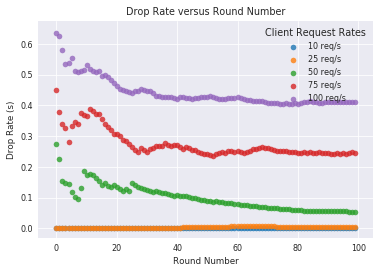

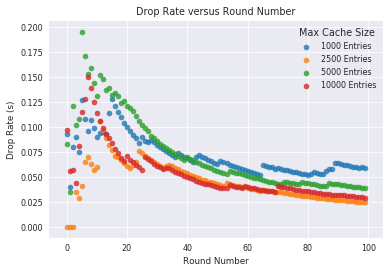

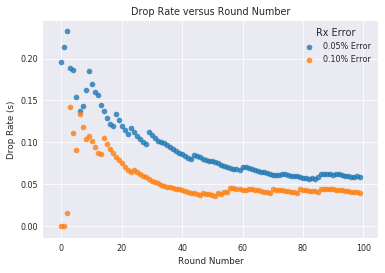

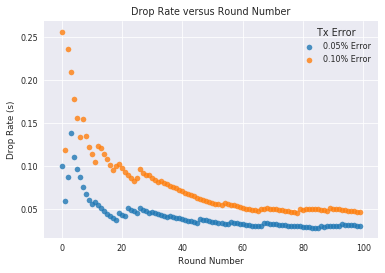

In [114]:
plt.clf()

fig, ax = plt.subplots()
for k, v in client_request_rates.items():
    sns.regplot(x=pd.Series(v.index), y=v['Drop Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Drop Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Drop Rate (s)')
plt.legend(title="Client Request Rates")
plt.savefig('drop_rate_round_number_client_request_rate.png')

fig, ax = plt.subplots()
for k, v in max_cache.items():
    sns.regplot(x=pd.Series(v.index), y=v['Drop Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Drop Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Drop Rate (s)')
plt.legend(title="Max Cache Size")
plt.savefig('drop_rate_round_number_max_cache_size.png')

fig, ax = plt.subplots()
for k, v in rx_error.items():
    sns.regplot(x=pd.Series(v.index), y=v['Drop Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Drop Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Drop Rate (s)')
plt.legend(title="Rx Error")
plt.savefig('drop_rate_round_number_rx_error.png')

fig, ax = plt.subplots()
for k, v in tx_error.items():
    sns.regplot(x=pd.Series(v.index), y=v['Drop Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Drop Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Drop Rate (s)')
plt.legend(title="Tx Error")
plt.savefig('drop_rate_round_number_tx_error.png')

plt.show()

## Retransmission Rate Versus Error Rate

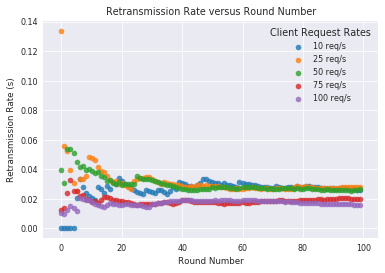

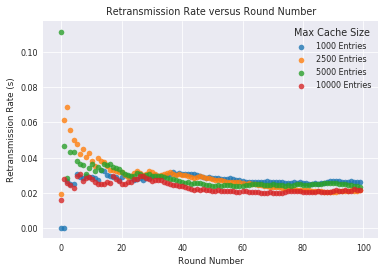

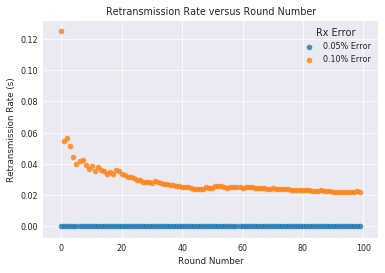

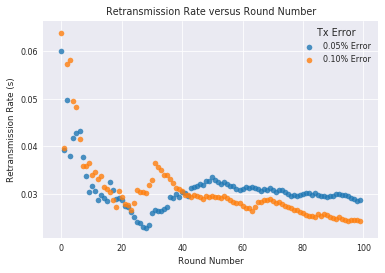

In [115]:
plt.clf()

fig, ax = plt.subplots()
for k, v in client_request_rates.items():
    sns.regplot(x=pd.Series(v.index), y=v['Retransmission Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Retransmission Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Retransmission Rate (s)')
plt.legend(title="Client Request Rates")
plt.savefig('retransmission_rate_round_number_client_request_rate.png')

fig, ax = plt.subplots()
for k, v in max_cache.items():
    sns.regplot(x=pd.Series(v.index), y=v['Retransmission Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Retransmission Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Retransmission Rate (s)')
plt.legend(title="Max Cache Size")
plt.savefig('retransmission_rate_round_number_max_cache_size.png')

fig, ax = plt.subplots()
for k, v in rx_error.items():
    sns.regplot(x=pd.Series(v.index), y=v['Retransmission Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Retransmission Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Retransmission Rate (s)')
plt.legend(title="Rx Error")
plt.savefig('retransmission_rate_round_number_rx_error.png')

fig, ax = plt.subplots()
for k, v in tx_error.items():
    sns.regplot(x=pd.Series(v.index), y=v['Retransmission Rate'], 
                fit_reg=False, label=k, ax=ax)
plt.title('Retransmission Rate versus Round Number')
plt.xlabel('Round Number')
plt.ylabel('Retransmission Rate (s)')
plt.legend(title="Tx Error")
plt.savefig('retransmission_rate_round_number_tx_error.png')

plt.show()